# Ornstein-Uhlenbeck Process

The Ornstein-Uhlenbeck Process is a stochastic process that roughly estimates the velocity of a massive Brownian particle with friction.

![Brownian Particle](https://upload.wikimedia.org/wikipedia/commons/c/c2/Brownian_motion_large.gif)

Uh, what?  It generates random samples from a Gaussian, normal, distribution where consecutive samples are more likely to be closer together than further apart.  This behavior makes to a great noise generator for a variety of real world applications.

There is a great Wiki page! 
https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process

In [2]:
import numpy as np

class OUNoise:
    """ Ornstein-Uhlenbeck Process
    https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process
    
    The Ornstein-Uhlenbeck Process is a stochastic process that is 
    markovian (next state is only a function of the previous state)
    and Gaussian (normally distributed).
    
    These characteristics make it well suited for a noise engine for many real
    world applications where consecutive samples should be related.
    """

    def __init__(self, size, mu, theta, sigma):
        """
        param: int size: Length of noise vector
        param: float mu: Mean of noise vector, long term expectation
        param: float theta: Disire for the process to migrate back toward the mean
        param: float sigma: Varience of noise
        """
        self.size = size
        self.theta = theta
        self.sigma = sigma
        
        # Generate vector mean
        self.set_mu(mu)

    def reset(self):
        """ Reset the internal state back to the mean """
        self.state = self.mu
        
    def set_mu(self, mu):
        """ Set new target mean value """
        # Noise vector mean
        self.mu = mu * np.ones(self.size)
        self.reset()

    def sample(self):
        """ Update process and return new state """
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(len(x))
        self.state = x + dx
        return self.state

In [213]:
import matplotlib.pyplot as plt

def plot_overlay(data_dict, size, cols):
    """"Generate plots to compare different noise sources""""
    colors = []
    n = len(data_dict)
    rows = n//cols+1
    plt.subplots(figsize=np.array(size)*(cols, rows))
    plt.subplot(rows, cols, 1)
    for i, (key, data) in enumerate(data_dict.items()):    
        alphas = np.linspace(0.0, 1, len(data), endpoint=True)
        color_alpha = np.ones((len(data),4))
        color_alpha[:, 3] = alphas
        line = plt.plot(data.x, data.y, alpha=0.5, label=key)
        color = line[-1].get_color()
        color = [int(color[1+2*i:3+2*i], 16)/255.0 for i in range(3)]+[1.0]
        colors.append(color)
        plt.scatter(data.x, data.y, color=color_alpha*color, label=None)
    plt.legend()
    plt.grid(True)
    xlim = plt.xlim()
    ylim = plt.ylim()
    
    for i, (key, data) in enumerate(data_dict.items()):
        plt.subplot(rows, cols, 2+i)
        plt.title(key)
        line = plt.plot(data.x, data.y, color=colors[i], alpha=0.5)
        plt.scatter(data.x, data.y, color=color_alpha*colors[i])
        plt.grid(True)
        plt.xlim(xlim)
        plt.ylim(ylim)
    plt.tight_layout()
    plt.show()

## Comparing to other noise

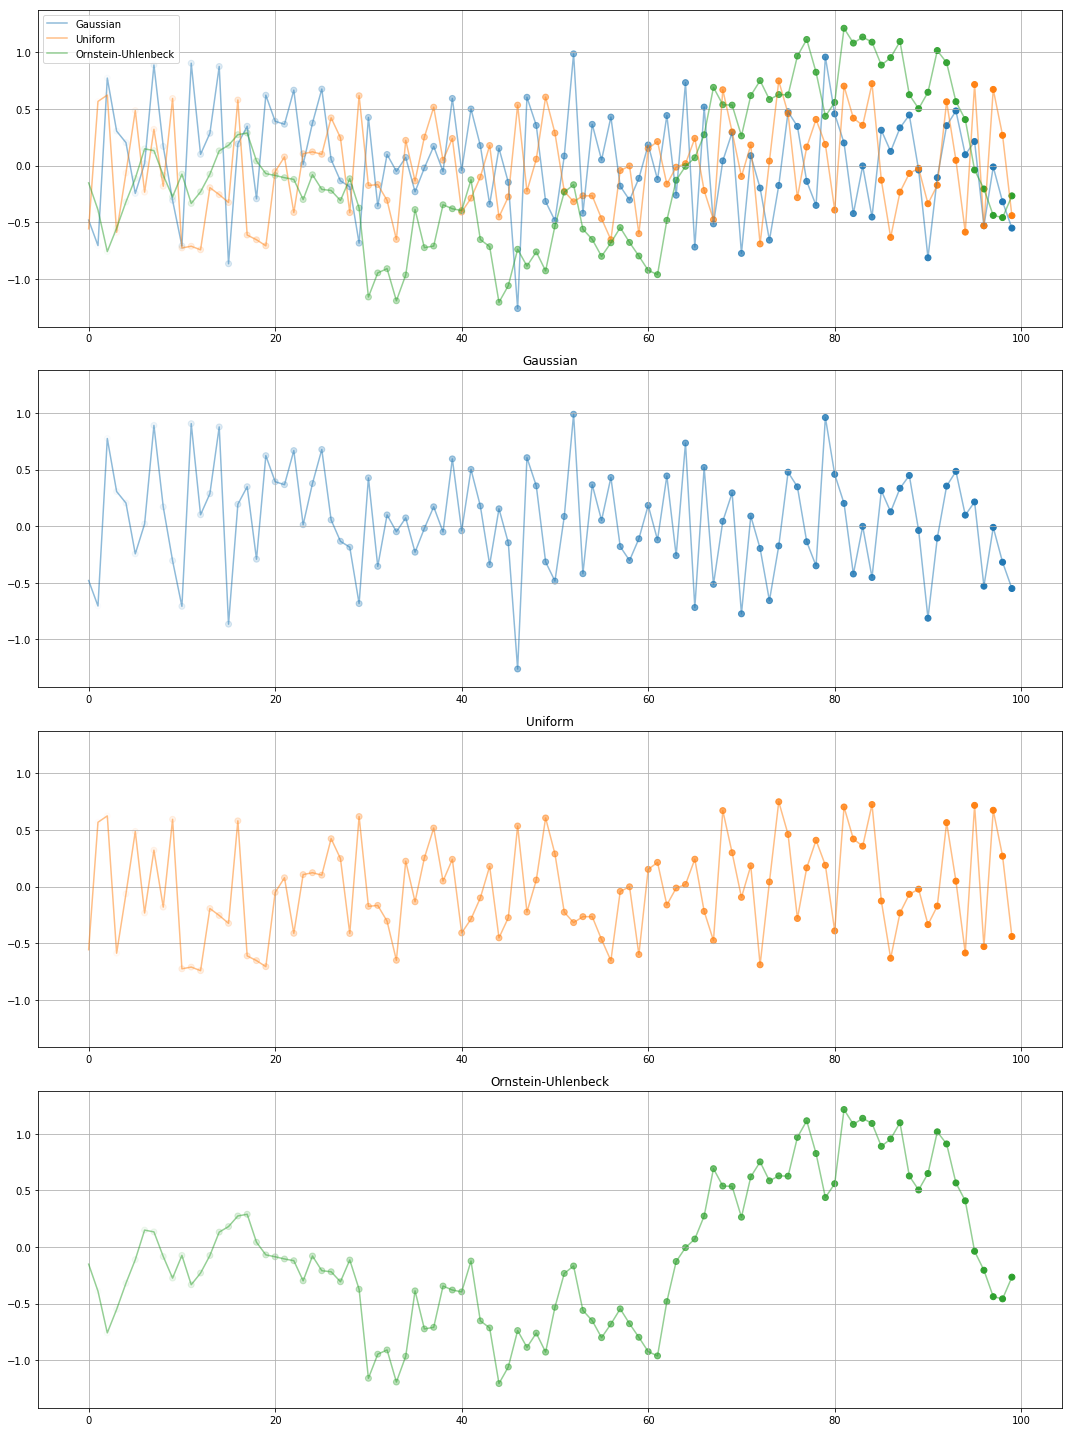

In [207]:
import pandas as pd

n = 100
mu = 0.0
sigma = 0.25
theta = 0.1

noise = dict()

# OU Noise
noise_process = OUNoise(1, mu, theta, sigma)
noise['Ornstein-Uhlenbeck'] = pd.DataFrame(dict(x=np.arange(n), 
                                                y=[noise_process.sample()[0] for _ in range(n)]))

# Gaussian Noise
noise['Gaussian'] = pd.DataFrame(dict(x=np.arange(n), 
                                      y=np.random.normal(0.0, 2*sigma, n)))

# Uniform Noise
noise['Uniform'] = pd.DataFrame(dict(x=np.arange(n), 
                                     y=np.random.uniform(-3*sigma, 3*sigma, n)))

plot_overlay(noise, (15,5), 1)

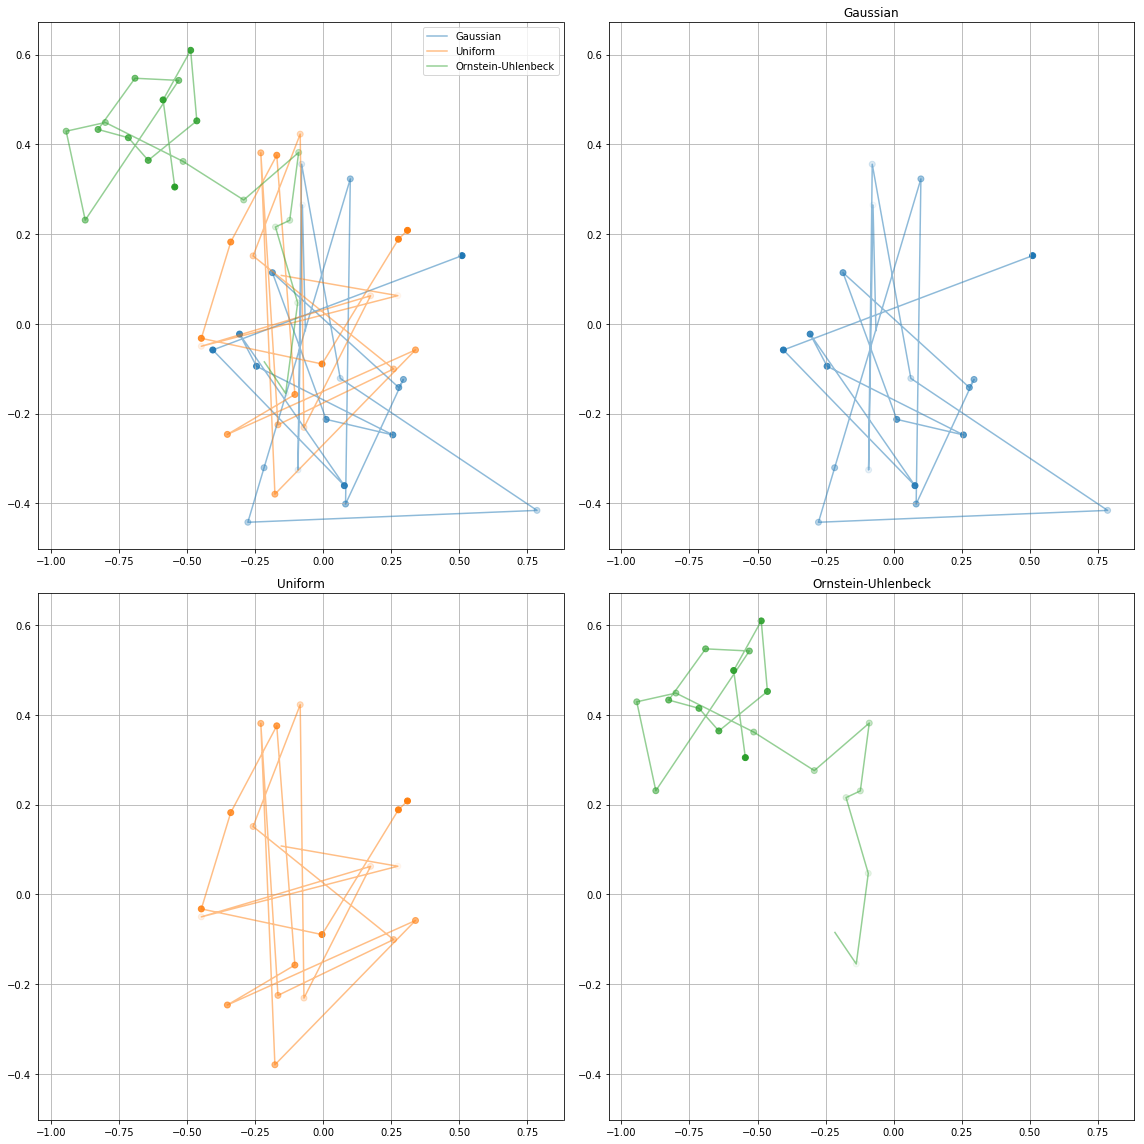

In [212]:
n = 20
mu = 0.0
sigma = 0.15
theta = 0.1

noise = dict()

# OU Noise
theta = 0.025
noise_gen_2d = OUNoise(2, mu, theta, sigma)
noise['Ornstein-Uhlenbeck'] = pd.DataFrame(np.vstack([noise_gen_2d.sample() for _ in range(n)]), columns=['x', 'y'])

# Gaussian Noise
noise['Gaussian'] = pd.DataFrame(np.random.normal(0.0, 2*sigma, [n, 2]), columns=['x', 'y'])

# Uniform Noise
noise['Uniform'] = pd.DataFrame(np.random.uniform(-3*sigma, 3*sigma, [n, 2]), columns=['x', 'y'])

plot_overlay(noise, (8, 8), 2)